### Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
### Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

#### Variable Description
* Loan_ID: Unikal Kredit ID
* Gender: Cins (Kişi/Qadın)
* Married: Evlilik (Bəli/Xeyr)
* Dependents: Asılı şəxslərin sayı
* Education: Təhsil (Məzun/Qeyri-məzun)
* Self_Employed: Fərdi sahibkar (Bəli/Xeyr)
* ApplicantIncome: Müraciət edən şəxsin gəliri
* CoapplicantIncome: Birgə müraciət edən şəxsin gəliri
* LoanAmount: Kredit məbləği (minlərlə)
* Loan_Amount_Term: Kredit müddəti (aylarla)
* Credit_History: Kredit tarixi (təlimatlara uyğun gəlir)
* Property_Area: Ərazi (Şəhər/Yarım-şəhər/Kənd)
* Loan_Status (Target): Kreditin təsdiqi (Hədəf) (Bəli/Xeyr)
#### Task: You are asked to predict loan eligibility using Ensemble Learning algorithms such as Voting,BaggingClassifier, GradientBoostingClassifier, XGBClassifier, lightgbm, CatBoostClassifier.

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

df = pd.read_csv(r"C:\Users\dell\Desktop\Python\week6\day1\loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Data Undestanding

#### 1. Veri Tipini Yoxlayın

In [2]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [5]:
df.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [6]:
192/612 # imbalance yoxdur

0.3137254901960784

In [7]:
422/612

0.6895424836601307

#### 2. Məlumatların Yoxluğu (Missing Data)

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [10]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [11]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### 3. Məlumatların Dağılımı

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


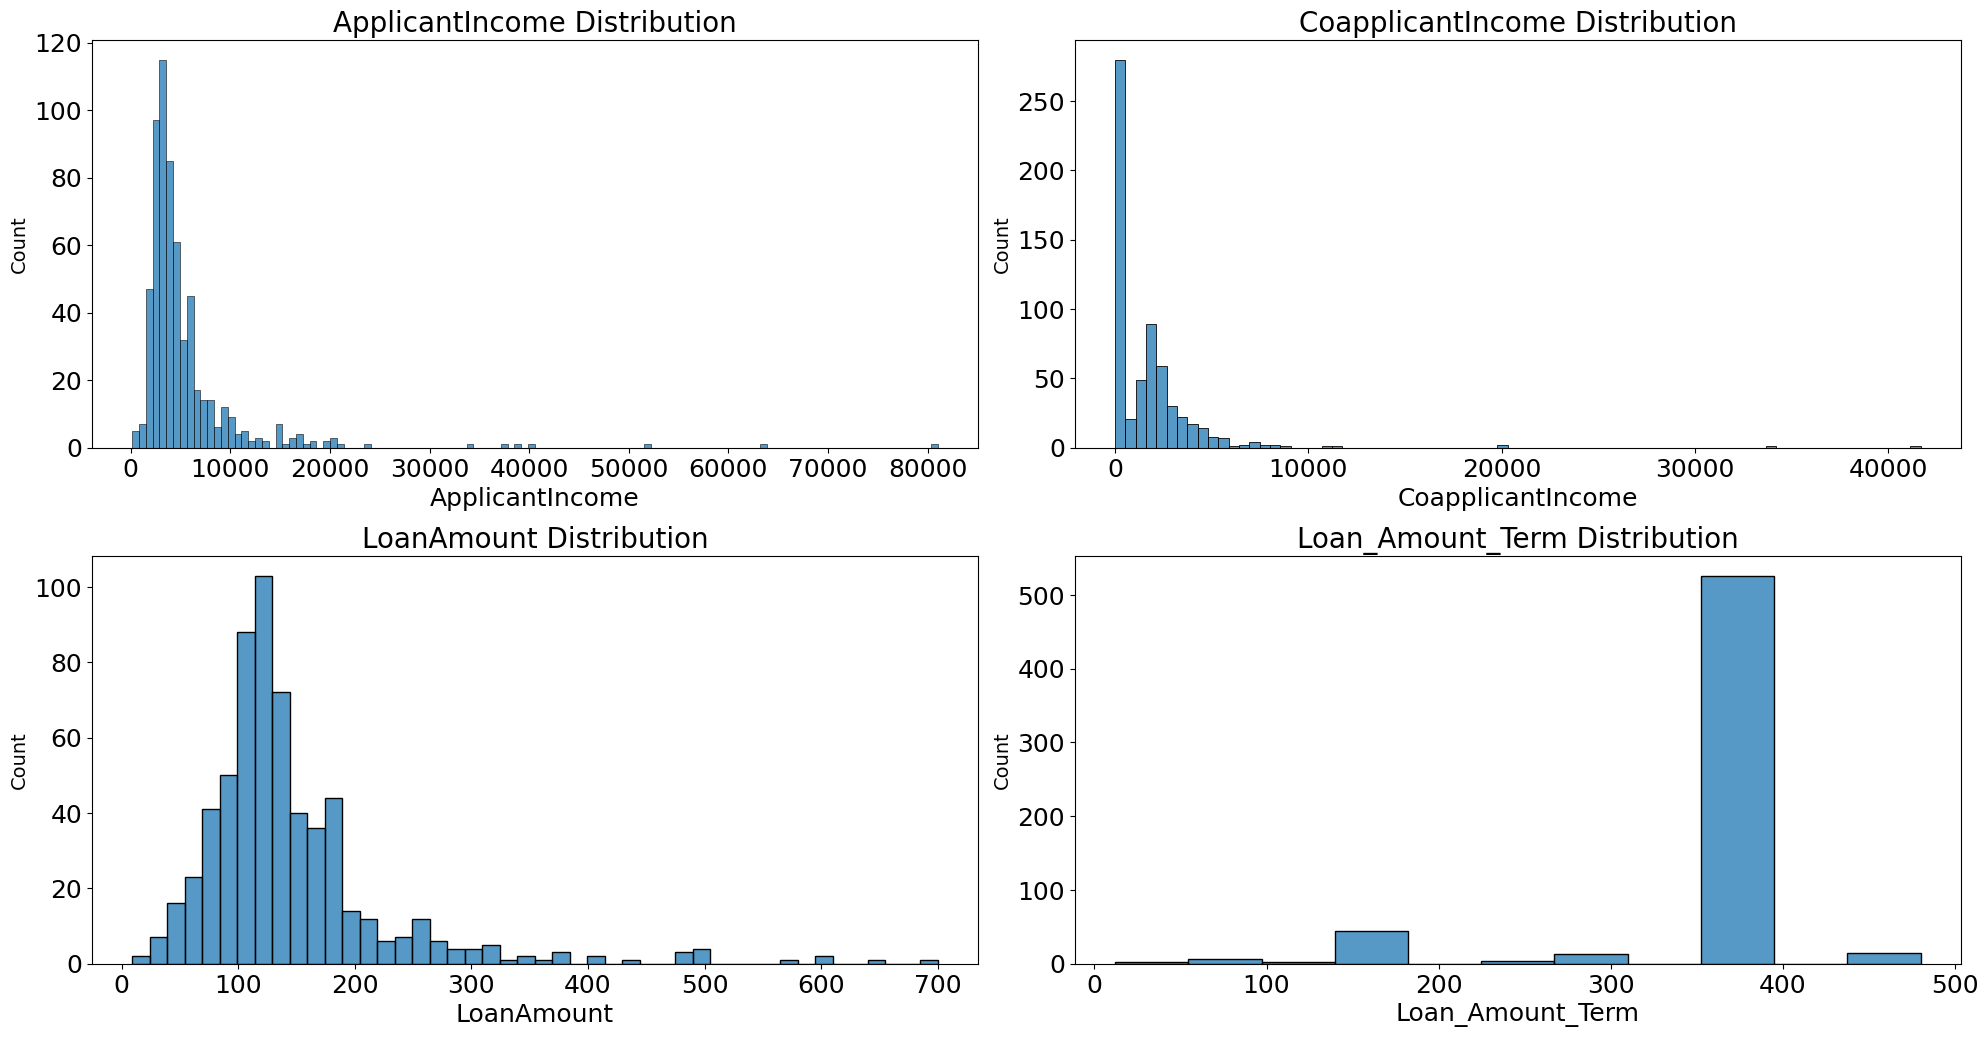

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot üçün istifadə ediləcək sütunların siyahısı
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Qrafiklər üçün təsvir sahəsini böyütmək
plt.figure(figsize=(20, 15))

# Hər bir sütun üçün countplot yaratmaq
for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=column,)
    plt.title(f'{column} Distribution', fontsize=20)  # Başlıq üçün yazı ölçüsü
    plt.xlabel(column, fontsize=18)  # X oxu üçün yazı ölçüsü
    plt.ylabel('Count', fontsize=14)  # Y oxu üçün yazı ölçüsü
    plt.xticks(fontsize=18)  # X oxundakı dəyərlər üçün yazı ölçüsü
    plt.yticks(fontsize=18)  # Y oxundakı dəyərlər üçün yazı ölçüsü

plt.tight_layout()
plt.show()

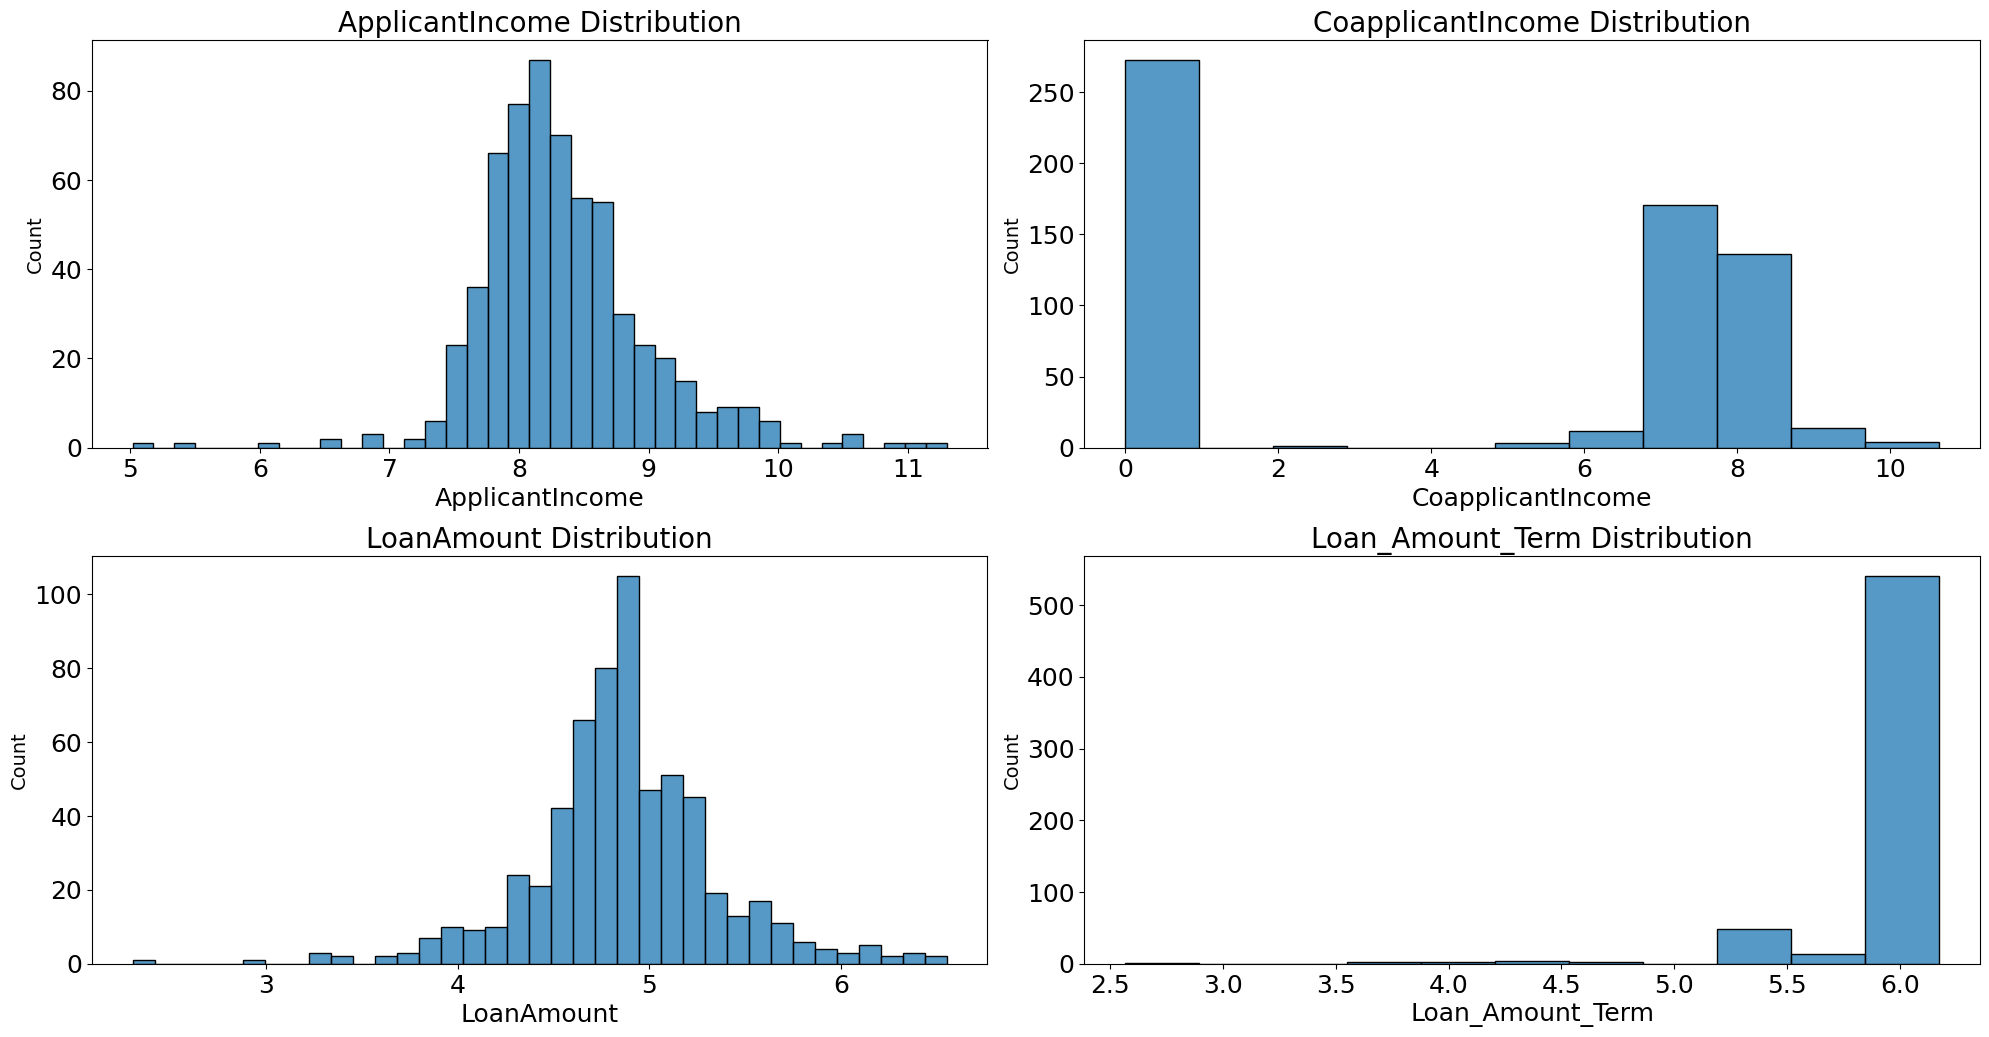

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot üçün istifadə ediləcək sütunların siyahısı
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Qrafiklər üçün təsvir sahəsini böyütmək
plt.figure(figsize=(20, 15))

# Hər bir sütun üçün countplot yaratmaq
for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=np.log(df[column] + 1))
    plt.title(f'{column} Distribution', fontsize=20)  # Başlıq üçün yazı ölçüsü
    plt.xlabel(column, fontsize=18)  # X oxu üçün yazı ölçüsü
    plt.ylabel('Count', fontsize=14)  # Y oxu üçün yazı ölçüsü
    plt.xticks(fontsize=18)  # X oxundakı dəyərlər üçün yazı ölçüsü
    plt.yticks(fontsize=18)  # Y oxundakı dəyərlər üçün yazı ölçüsü

plt.tight_layout()
plt.show()

#### 4. Kateqoriyal Dəyərlərin Paylanması

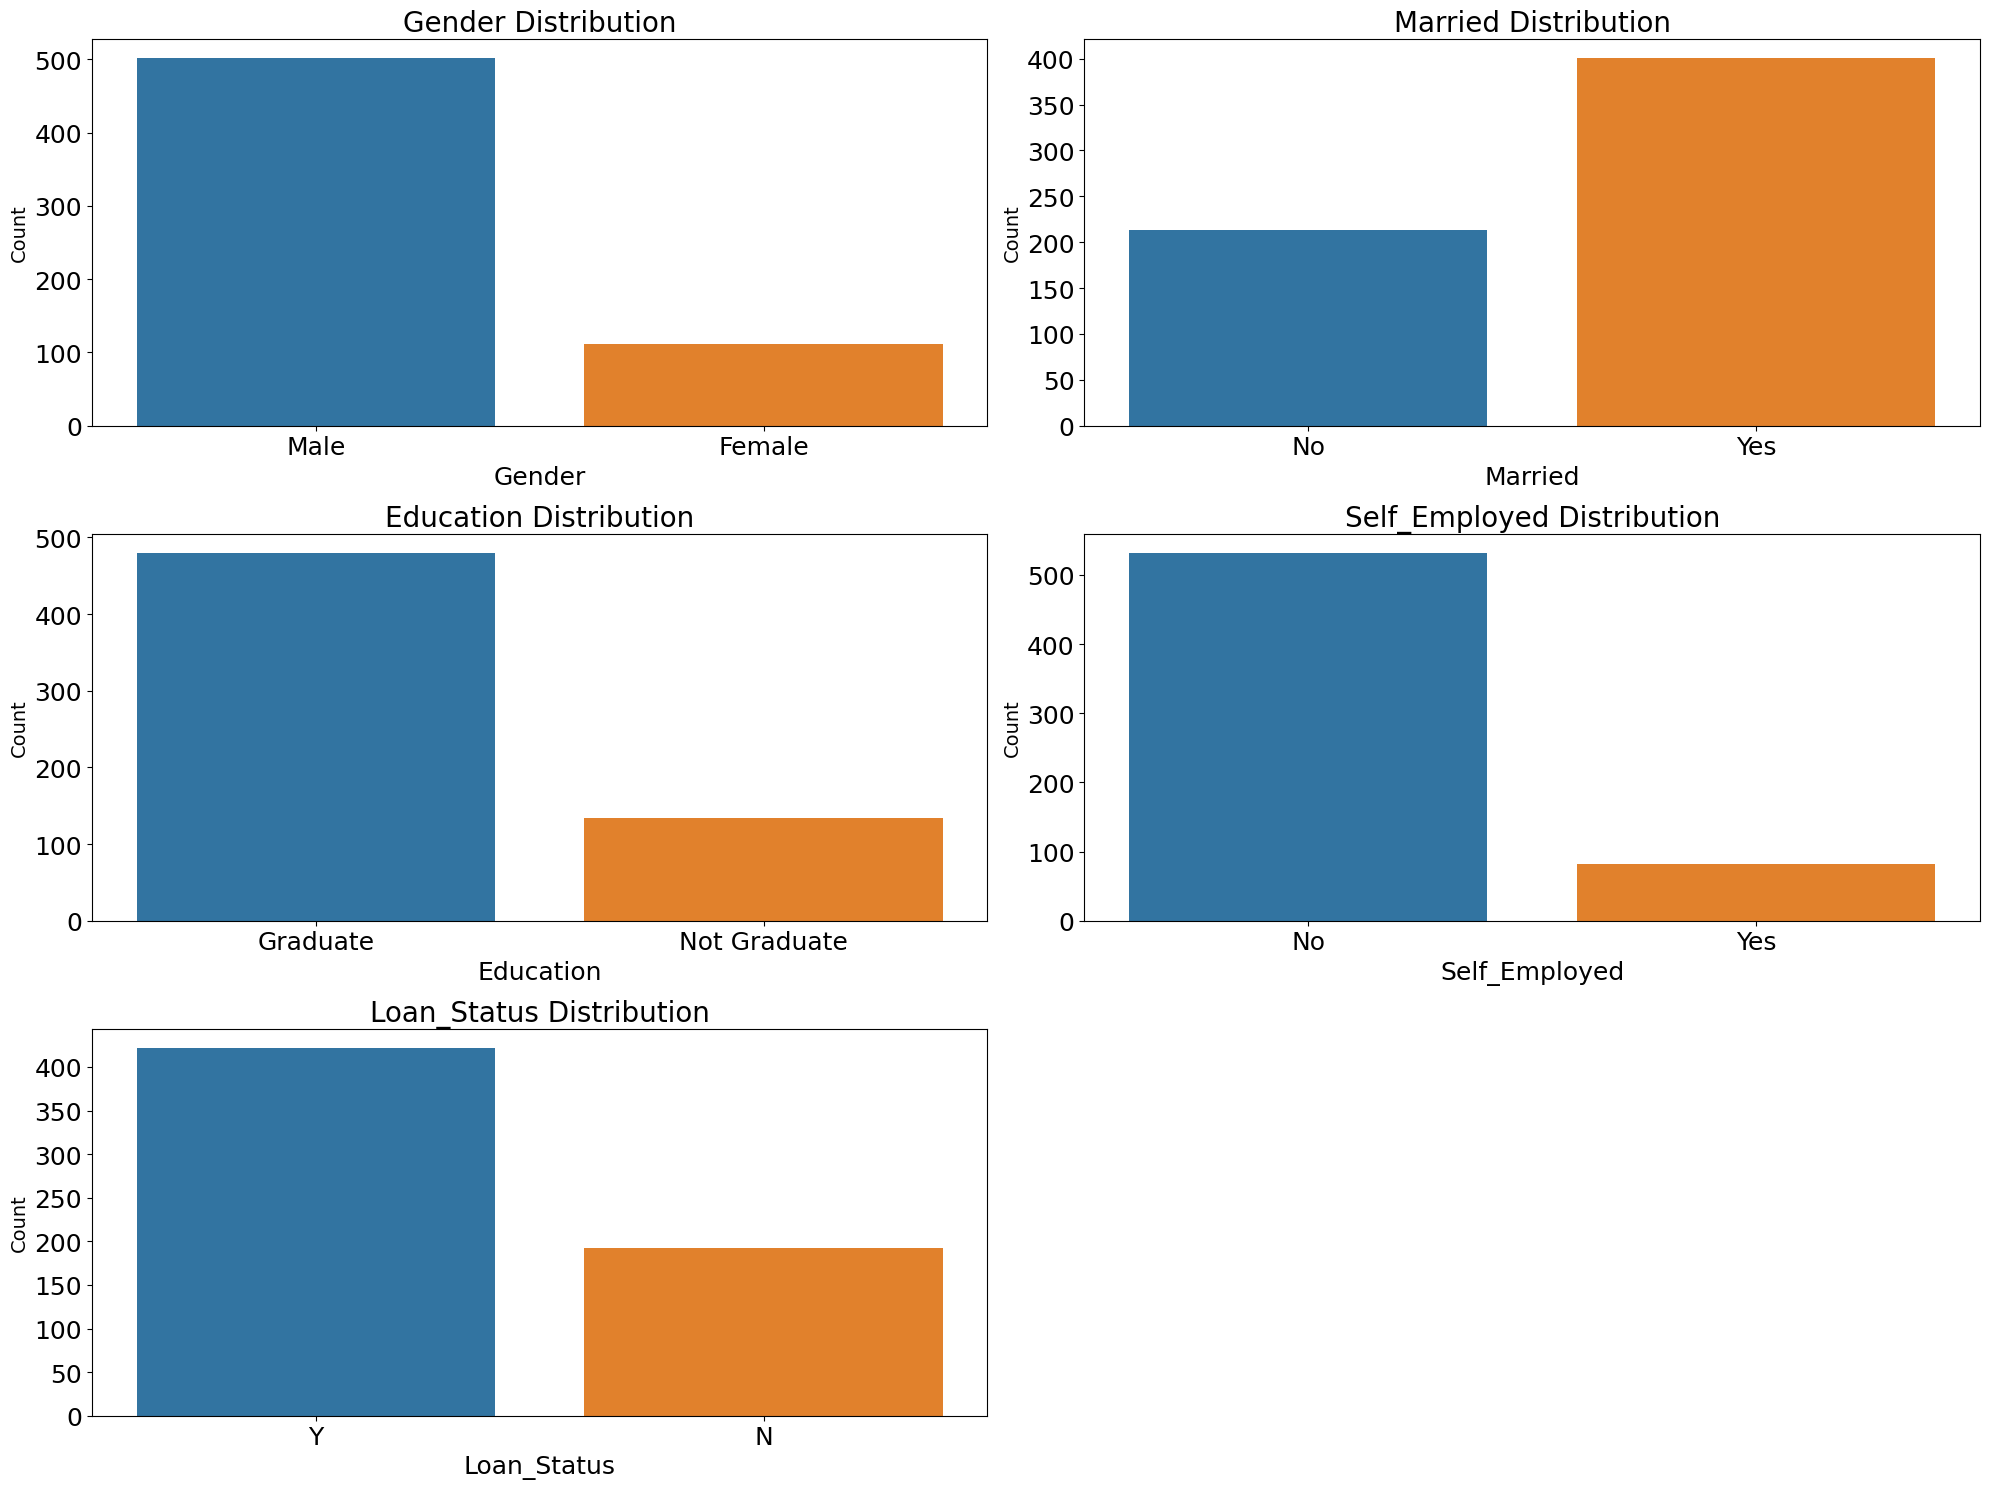

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot üçün istifadə ediləcək sütunların siyahısı
columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

# Qrafiklər üçün təsvir sahəsini böyütmək
plt.figure(figsize=(20, 15))

# Hər bir sütun üçün countplot yaratmaq
for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=column, hue=column)
    plt.title(f'{column} Distribution', fontsize=20)  # Başlıq üçün yazı ölçüsü
    plt.xlabel(column, fontsize=18)  # X oxu üçün yazı ölçüsü
    plt.ylabel('Count', fontsize=14)  # Y oxu üçün yazı ölçüsü
    plt.xticks(fontsize=18)  # X oxundakı dəyərlər üçün yazı ölçüsü
    plt.yticks(fontsize=18)  # Y oxundakı dəyərlər üçün yazı ölçüsü

plt.tight_layout()
plt.show()



In [17]:
df.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

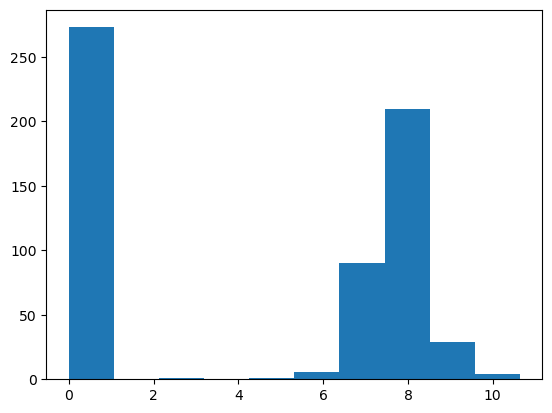

In [18]:
import numpy as np
plt.hist(np.log(df['CoapplicantIncome'] + 1))
plt.show()

#### 5. Hədəf Dəyişən (Target Variable)

In [19]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [20]:
192/612 # imbalance yoxdur cunki 30% yuxaridir

0.3137254901960784

In [21]:
422/612

0.6895424836601307

#### 6. Məlumatların Əlaqəsi (Correlation)

#### Get dummies etmek lazimidr

In [22]:
import pandas as pd

df_1 = df.drop('Loan_ID', axis=1)

# Sayısal və kateqorik dəyişənləri müəyyən edin
numerical_cols = df_1.select_dtypes(exclude=['object']).columns
categorical_cols = df_1.select_dtypes(include=['object']).columns

# Yalnız kateqorik dəyişənləri one-hot encoding ilə kodlaşdırmaq
df_encoded = pd.get_dummies(df_1[categorical_cols], drop_first=True, dtype='int')

# Sayısal dəyişənləri olduğu kimi saxlamaq
df_numerical = df_1[numerical_cols]

# Kodlaşdırılmış kateqorik dəyişənləri və sayısal dəyişənləri birləşdirmək
df_final = pd.concat([df_numerical, df_encoded], axis=1)

df_final


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


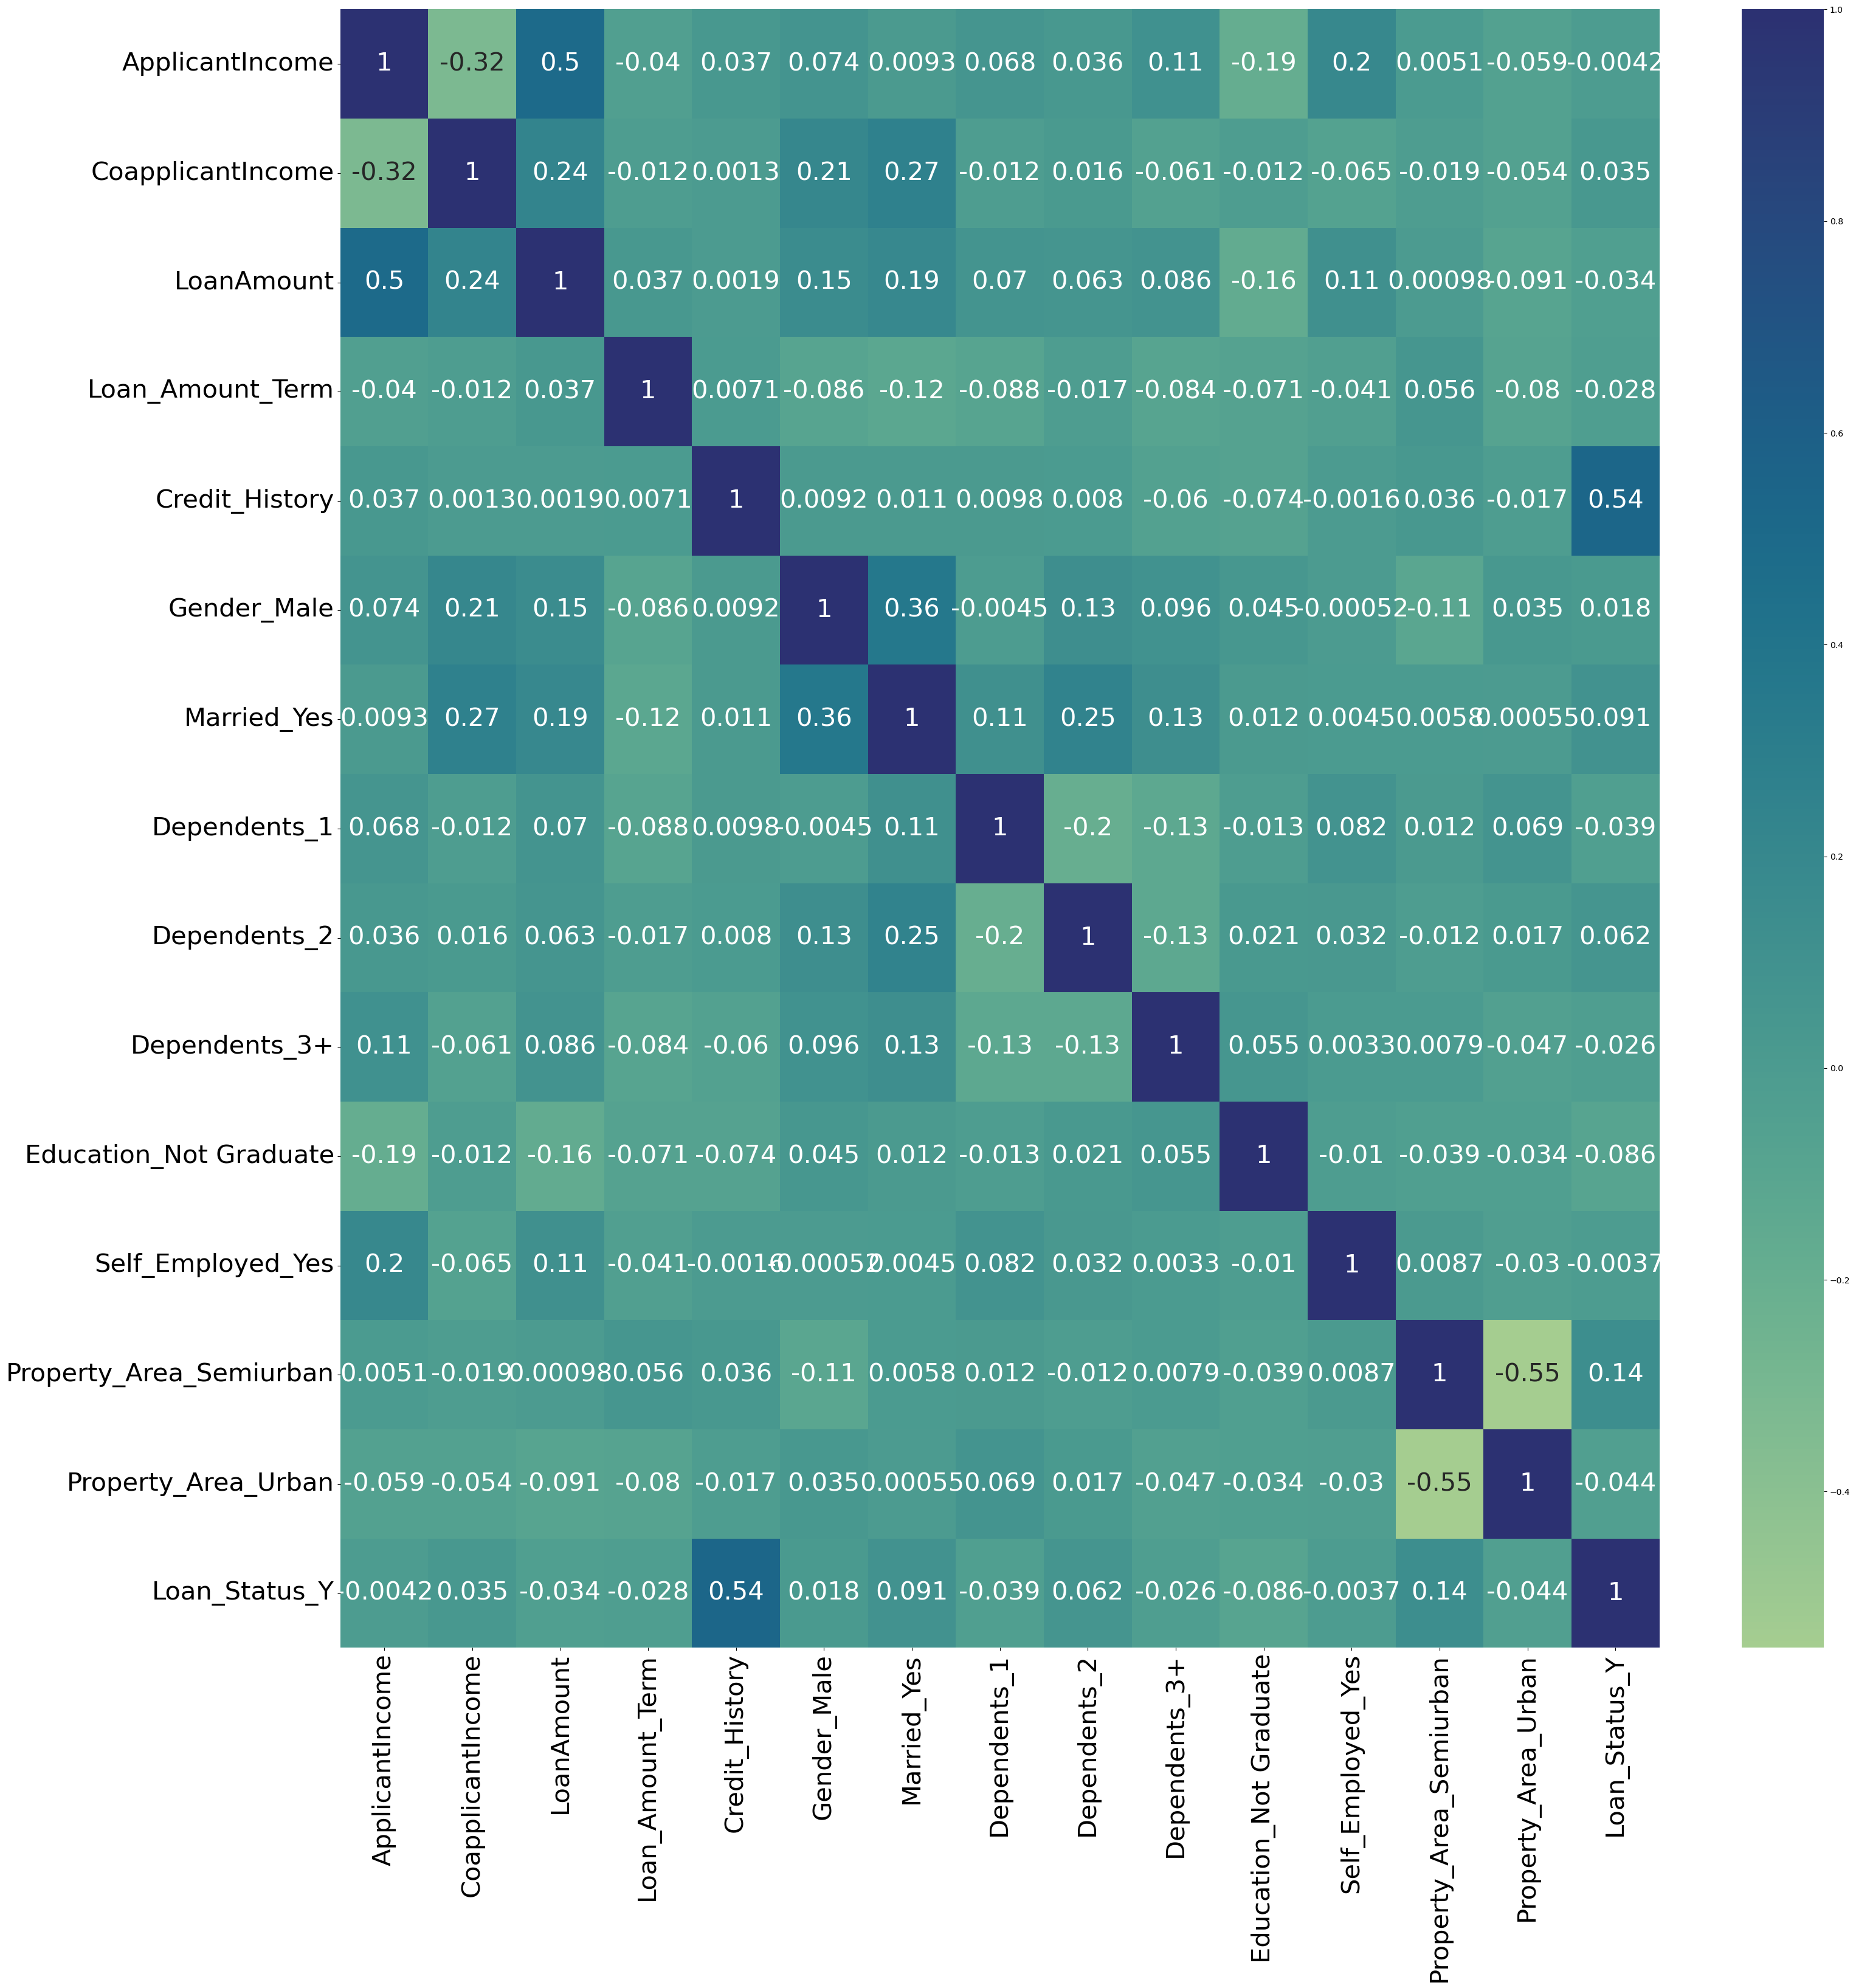

In [23]:
plt.figure(figsize=(35, 35))
sns.heatmap(df_final.corr(method='spearman'), annot=True, annot_kws={"size": 30}, cmap="crest")
plt.xticks(fontsize=30)  # Sütun adlarının ölçüsünü böyüdür
plt.yticks(fontsize=30, rotation=0)  # Sətir adlarının ölçüsünü böyüdür
plt.show()

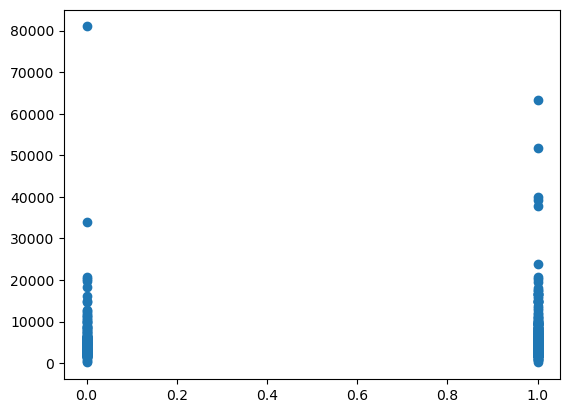

In [24]:
plt.scatter(df_final.Loan_Status_Y, df_final.ApplicantIncome)

In [25]:
from scipy.stats import ttest_rel
# Paired sample t-test tətbiq etmək
t_statistic, p_value = ttest_rel(df_final.Loan_Status_Y, df_final.ApplicantIncome)

print(f'T-statistic: {t_statistic}')
print(f'p-value: {p_value}')

T-statistic: -21.9142988876132
p-value: 4.748130362747891e-79


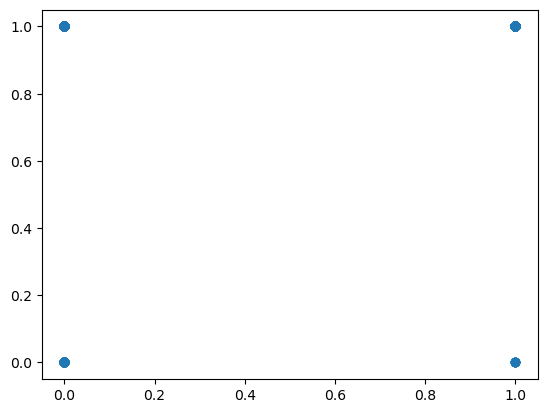

In [26]:
plt.scatter(df_final.Loan_Status_Y, df_final.Credit_History)

#### 7. Pivotal Dəyişənlərin Təsiri

In [27]:
pd.crosstab(df['Credit_History'], df['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


In [28]:
pd.crosstab(df.Education, df['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


#### 8. Outlier-ları Yoxlamaq

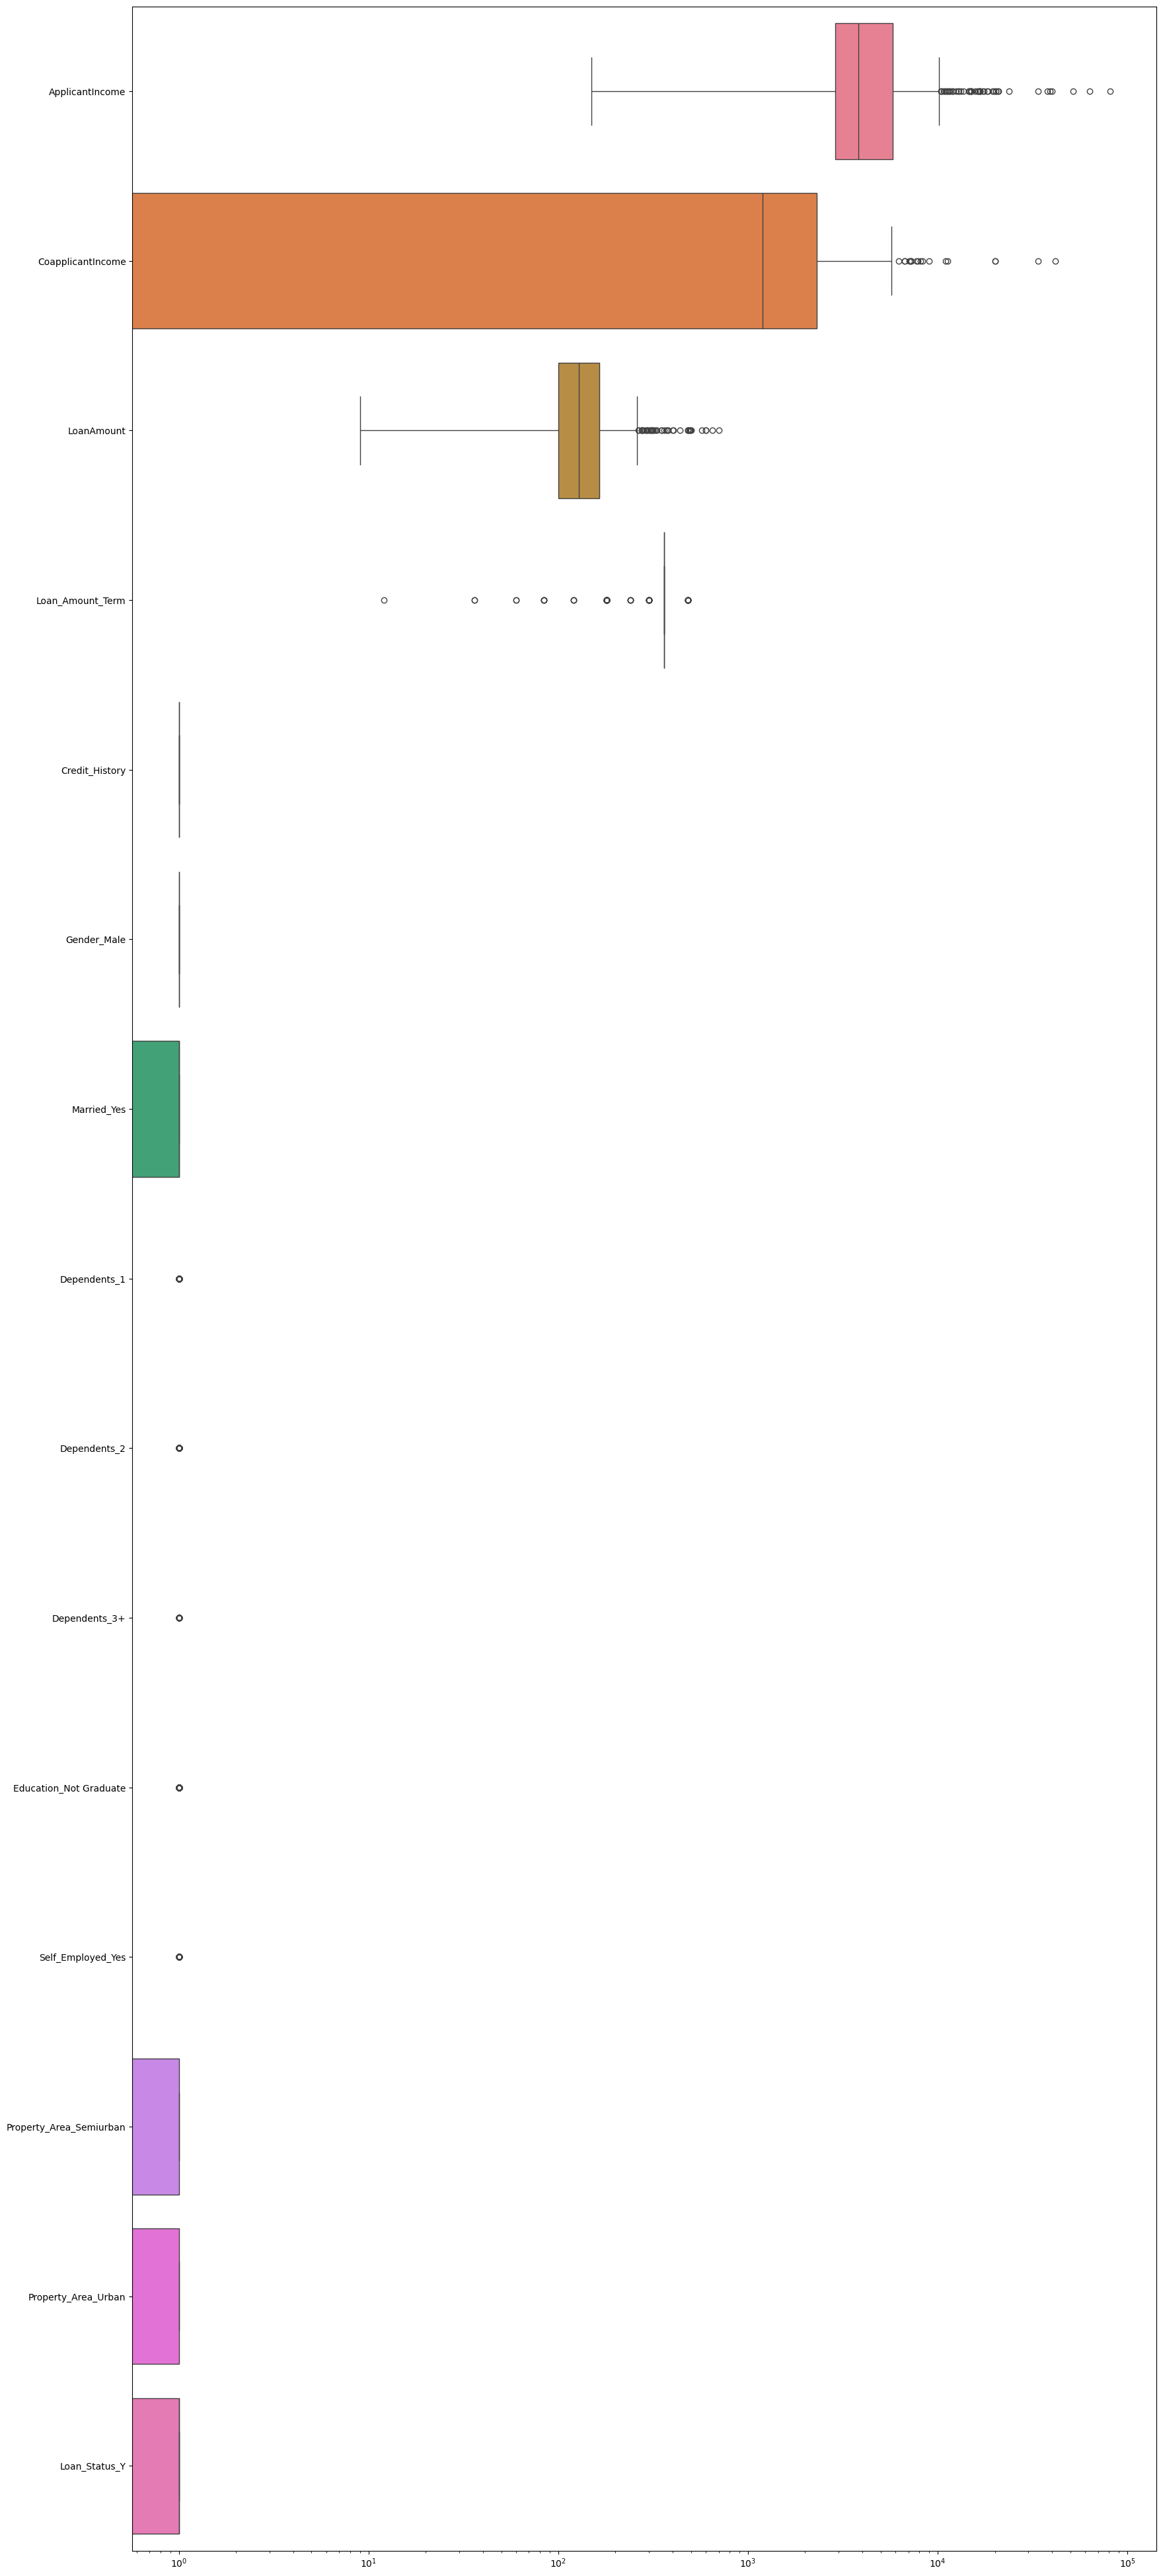

In [29]:
plt.figure(figsize=(20, 50))
ax = sns.boxplot(data=df_final, orient='h')
ax.set_title('', fontsize=18)
ax.set(xscale = 'log')
plt.show()

In [30]:
df_final

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


## Yeni Dəyişənlər Yaratmaq (Feature Engineering)

In [31]:
# TotalIncome adlı yeni bir dəyişən yaratmaq
df_final['TotalIncome'] = df_final['ApplicantIncome'] + df_final['CoapplicantIncome']

In [32]:
df_final.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [33]:
df_final

,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1,5849.0
1,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0,6091.0
2,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1,3000.0
3,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1,4941.0
4,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1,2900.0
610,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1,4106.0
611,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1,8312.0
612,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1,7583.0


In [34]:
list_ = list(df_final.columns[0:-1])

In [35]:
list_.insert(0, df_final.columns[-1])

In [36]:
list_

['TotalIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Gender_Male',
 'Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Not Graduate',
 'Self_Employed_Yes',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Loan_Status_Y']

In [37]:
df_final = pd.DataFrame(data=df_final, columns=list_)
df_final

,TotalIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,6091.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,4941.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8312.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [38]:
X = df_final.drop(columns='Loan_Status_Y')
y = df_final["Loan_Status_Y"]

### Train Test split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Hard Voting

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

model1 = LogisticRegression(random_state=42)
model2 = DecisionTreeClassifier(random_state=42)
model3 = SVC(probability=True, random_state=42)

from sklearn.ensemble import VotingClassifier

estimators = [('lgr', model1), ('dt', model2) , ('svc', model3) ]
voting_hard = VotingClassifier(estimators, voting="hard")

In [42]:
voting_hard_model = voting_hard.fit(X_train, y_train)

In [43]:
voting_hard_pred = voting_hard_model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                            classification_report, confusion_matrix

In [45]:
print('confusion  matrix:\n', confusion_matrix(y_test, voting_hard_pred))
print()
print('accuracy: ', accuracy_score(y_test, voting_hard_pred))
print('roc_auc_score: ', roc_auc_score(y_test, voting_hard_pred))
print('f1_score: ', f1_score(y_test, voting_hard_pred))
print('precision_score: ', precision_score(y_test, voting_hard_pred))
print('recall_score: ', recall_score(y_test, voting_hard_pred))
print()
print('classification_report:\n', classification_report(y_test, voting_hard_pred))

confusion  matrix:
 [[17 21]
 [ 2 83]]

accuracy:  0.8130081300813008
roc_auc_score:  0.7119195046439628
f1_score:  0.8783068783068783
precision_score:  0.7980769230769231
recall_score:  0.9764705882352941

classification_report:
               precision    recall  f1-score   support

           0       0.89      0.45      0.60        38
           1       0.80      0.98      0.88        85

    accuracy                           0.81       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.83      0.81      0.79       123



##  overfitting edib etmediyini yxolayiram

In [46]:
train_score = voting_hard_model.score(X_train, y_train)
test_score = voting_hard_model.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.8207739307535642
Test Score: 0.8130081300813008


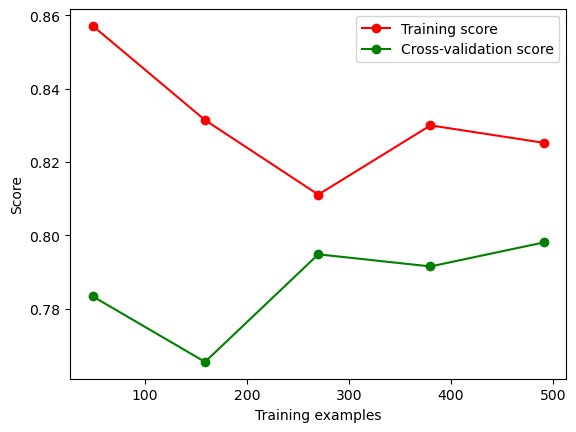

In [47]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(voting_hard_model, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(voting_hard_model, X_train, y_train, cv=5)

print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))

Cross-Validation Scores: [0.74747475 0.75510204 0.80612245 0.7755102  0.78571429]
Mean Score: 0.7739847454133169


## Soft Voting

In [49]:
estimators = [('lgr', model1), ('dt', model2) , ('svc', model3) ]
voting_soft = VotingClassifier(estimators, voting="soft")

In [50]:
voting_soft_model = voting_soft.fit(X_train, y_train)

In [51]:
voting_soft_pred = voting_soft_model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                            classification_report, confusion_matrix

print('confusion  matrix:\n', confusion_matrix(y_test, voting_soft_pred))
print()
print('accuracy: ', accuracy_score(y_test, voting_soft_pred))
print('roc_auc_score: ', roc_auc_score(y_test, voting_soft_pred))
print('f1_score: ', f1_score(y_test, voting_soft_pred))
print('precision_score: ', precision_score(y_test, voting_soft_pred))
print('recall_score: ', recall_score(y_test, voting_soft_pred))
print()
print('classification_report:\n', classification_report(y_test, voting_soft_pred))

confusion  matrix:
 [[23 15]
 [15 70]]

accuracy:  0.7560975609756098
roc_auc_score:  0.7143962848297213
f1_score:  0.8235294117647058
precision_score:  0.8235294117647058
recall_score:  0.8235294117647058

classification_report:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61        38
           1       0.82      0.82      0.82        85

    accuracy                           0.76       123
   macro avg       0.71      0.71      0.71       123
weighted avg       0.76      0.76      0.76       123



## Bagging Classifier

In [53]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
bag_rf = BaggingClassifier(estimator=RandomForestClassifier(), random_state=123)

In [54]:
bag_rf_model = bag_rf.fit(X_train, y_train)

In [55]:
bag_rf_pred = bag_rf_model.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                            classification_report, confusion_matrix

print('confusion  matrix:\n', confusion_matrix(y_test, bag_rf_pred))
print()
print('accuracy: ', accuracy_score(y_test, bag_rf_pred))
print('roc_auc_score: ', roc_auc_score(y_test, bag_rf_pred))
print('f1_score: ', f1_score(y_test, bag_rf_pred))
print('precision_score: ', precision_score(y_test, bag_rf_pred))
print('recall_score: ', recall_score(y_test, bag_rf_pred))
print()
print('classification_report:\n', classification_report(y_test, bag_rf_pred))

confusion  matrix:
 [[23 15]
 [ 4 81]]

accuracy:  0.8455284552845529
roc_auc_score:  0.7791021671826625
f1_score:  0.8950276243093923
precision_score:  0.84375
recall_score:  0.9529411764705882

classification_report:
               precision    recall  f1-score   support

           0       0.85      0.61      0.71        38
           1       0.84      0.95      0.90        85

    accuracy                           0.85       123
   macro avg       0.85      0.78      0.80       123
weighted avg       0.85      0.85      0.84       123



In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = SVC(probability=True)
model4 = LogisticRegression()
model5 = KNeighborsClassifier()
model6 = GaussianNB()

list_models = [model1, model2, model3, model4, model5, model6]

n=0
for model in list_models:
    bag = BaggingClassifier(estimator=model, random_state=123)
    bag.fit(X_train, y_train)
    bag_pred = bag.predict(X_test)
    from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                            classification_report, confusion_matrix
    n+=1
    print(f'{n}:', bag.estimator.__class__.__name__)
    print('confusion  matrix:\n', confusion_matrix(y_test, bag_pred))
    print()
    print('accuracy: ', accuracy_score(y_test, bag_pred))
    print('roc_auc_score: ', roc_auc_score(y_test, bag_pred))
    print('f1_score: ', f1_score(y_test, bag_pred))
    print('precision_score: ', precision_score(y_test, bag_pred))
    print('recall_score: ', recall_score(y_test, bag_pred))
    print()
    print('classification_report:\n', classification_report(y_test, bag_pred))
    

1: DecisionTreeClassifier
confusion  matrix:
 [[28 10]
 [14 71]]

accuracy:  0.8048780487804879
roc_auc_score:  0.7860681114551085
f1_score:  0.8554216867469879
precision_score:  0.8765432098765432
recall_score:  0.8352941176470589

classification_report:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.88      0.84      0.86        85

    accuracy                           0.80       123
   macro avg       0.77      0.79      0.78       123
weighted avg       0.81      0.80      0.81       123

2: RandomForestClassifier
confusion  matrix:
 [[23 15]
 [ 4 81]]

accuracy:  0.8455284552845529
roc_auc_score:  0.7791021671826625
f1_score:  0.8950276243093923
precision_score:  0.84375
recall_score:  0.9529411764705882

classification_report:
               precision    recall  f1-score   support

           0       0.85      0.61      0.71        38
           1       0.84      0.95      0.90        85

    ac

## Boosting Models

In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


model1 = AdaBoostClassifier(random_state=42)
model2 = GradientBoostingClassifier(random_state=42)
model3 = XGBClassifier(random_state=42)
model4 = CatBoostClassifier(iterations = 2, random_state=42)
model5 = LGBMClassifier(
                        boosting_type='gbdt',
                        objective='binary',  # Klassifikasiya üçün
                        metric='binary_logloss',
                        min_split_gain=0.5,  # Split üçün minimum "gain"
                        min_child_samples=20,  # Split üçün minimum nümunə sayı
                        max_depth=7,  # Maksimum dərinlik
                        random_state=42,  # Reproducibility üçün
                        verbosity=-1  # Warning-ları tamamilə söndürmək
)

list_models = [model1, model2, model3, model4, model5]

n=0
for model in list_models:
    boost_model = model
    boost_model.fit(X_train, y_train)
    boost_pred = boost_model.predict(X_test)
    from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                            classification_report, confusion_matrix
    n+=1
    print(f'{n}:', boost_model.__class__.__name__)
    print('confusion  matrix:\n', confusion_matrix(y_test, boost_pred))
    print()
    print('accuracy: ', accuracy_score(y_test, boost_pred))
    print('roc_auc_score: ', roc_auc_score(y_test, boost_pred))
    print('f1_score: ', f1_score(y_test, boost_pred))
    print('precision_score: ', precision_score(y_test, boost_pred))
    print('recall_score: ', recall_score(y_test, boost_pred))
    print()
    print('classification_report:\n', classification_report(y_test, boost_pred))

1: AdaBoostClassifier
confusion  matrix:
 [[24 14]
 [ 5 80]]

accuracy:  0.8455284552845529
roc_auc_score:  0.7863777089783281
f1_score:  0.8938547486033519
precision_score:  0.851063829787234
recall_score:  0.9411764705882353

classification_report:
               precision    recall  f1-score   support

           0       0.83      0.63      0.72        38
           1       0.85      0.94      0.89        85

    accuracy                           0.85       123
   macro avg       0.84      0.79      0.81       123
weighted avg       0.84      0.85      0.84       123

2: GradientBoostingClassifier
confusion  matrix:
 [[23 15]
 [ 5 80]]

accuracy:  0.8373983739837398
roc_auc_score:  0.7732198142414861
f1_score:  0.8888888888888888
precision_score:  0.8421052631578947
recall_score:  0.9411764705882353

classification_report:
               precision    recall  f1-score   support

           0       0.82      0.61      0.70        38
           1       0.84      0.94      0.89        